In [ ]:
'''Iris Distribution Analysis'''

In [1]:
def referenceToInnerCornet(inner_corner,cord,eye):
    
    h,w = eye.shape[:2]
    
    
    inner_corner[1] = h-inner_corner[1]
    
    cord[1] = h-cord[1]
    
    return [cord[0]-inner_corner[0],cord[1]-inner_corner[1]]

In [ ]:


for idx,row in df.iterrows():
    
    img_path = os.path.join(IMG_PATH,row["ImageName"].replace('"','')[7:])
    
    
    
    print(img_path)
    bbox = list(map(float,row["Coordinates"][1:-1].split(",")))

    
    
    # plt.plot(r_prime_cx,r_prime_cy, marker="o", markersize=5, markeredgecolor="red", markerfacecolor="green")
    
    
    # plt.plot(r_prime_ox,r_prime_oy, marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
    
    img = cv2.imread(img_path)

    
    
    results = face_mesh.process(img)
    
    if results.multi_face_landmarks is not None:
        image_count +=1
        
        img_name = f'I2head_{image_count}'
        
        landmarks = results.multi_face_landmarks[0]

        shape_arr = mpArrayToNumpy(landmarks, img)

        left_eye, right_eye, Leye, Reye = cropped_image(
            img, shape_arr)
        
        
        
        
        left_inner,left_center,left_outer,right_inner,right_center,right_outer = rescaleAccordingToImageCrop(bbox,Leye,Reye)
        
    
            

        
        print(f"Right Inner: {} Right Center:{} Right Outer: {}")


        # cv2.imwrite(os.path.join(
        #     saved_dir, f"{img_name}_left.png"), left_eye)

        # cv2.imwrite(os.path.join(
        #     saved_dir, f"{img_name}_right.png"), right_eye)

        if visualize:

            cv2.circle(left_eye, (int(left_center[0]), int(
                left_center[1])), 1, (0, 0, 255), -1)
            
            
            cv2.circle(left_eye, (int(left_inner[0]), int(
                left_inner[1])), 1, (0, 255, 0), -1)
            
            cv2.circle(left_eye, (int(left_outer[0]), int(
                left_outer[1])), 1, (0, 0, 255), -1)
            
            
            
            
            
            cv2.circle(right_eye, (int(right_center[0]), int(
                right_center[1] )), 1, (0, 0, 255), -1)
            
            
            cv2.circle(right_eye, (int(right_inner[0]), int(
                right_inner[1])), 1, (0, 255,0), -1)
            
            cv2.circle(right_eye, (int(right_outer[0]), int(
                right_outer[1])), 1, (0, 0, 255), -1)

            fig, axs = plt.subplots(1, 2)

            axs[0].set_title("Left Eye")
            axs[1].set_title("Right Eye")

            axs[0].axis("off")
            axs[1].axis("off")

            axs[0].imshow(left_eye[:, :, ::-1])
            axs[1].imshow(right_eye[:, :, ::-1])

            plt.tight_layout()
            plt.show()
            plt.close('all')

        # Normlaize the Center Coordinates before send to the CSV file
        data_array.append({"Image_Name": f"{img_name}_left.png",
                            "X1": float(left_center[0])/left_eye.shape[1],
                            "Y1": float(left_center[1])/left_eye.shape[0]})

        data_array.append({"Image_Name": f"{img_name}_right.png",
                            "X1": float(right_center[0])/right_eye.shape[1],
                            "Y1": float(right_center[1])/right_eye.shape[0]})
    
    else:
        print(
            f"MediaPipe was failed to detect the faces on the image name {img_name}")
        continue

    break

In [ ]:
right_inner[1] = right_eye.shape[0] - right_inner[1]
right_center[1] = right_eye.shape[0] - right_center[1]
right_outer[1] = right_eye.shape[0] - right_outer[1]

print(f"Right Inner: {right_inner} Right Center:{right_center} Right Outer: {right_outer}")

In [ ]:

from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid()

plt.plot(right_inner[0],right_inner[1], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="green")



plt.plot(right_center[0],right_center[1], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")


plt.plot(right_outer[0],right_outer[1], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="blue")

plt.show()

In [ ]:
# Reference to the Inner Corner

right_center[0] = right_center[0] - right_inner[0]
right_center[1] = right_center[1] - right_inner[1]



right_outer[0] = right_outer[0] - right_inner[0]
right_outer[1] = right_outer[1] - right_inner[1]


In [ ]:
plt.plot(right_center[0],right_center[1], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")


plt.plot(right_outer[0],right_outer[1], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="blue")

plt.show()

In [ ]:
right_center[0] = right_center[0] - right_inner[0]

right_center[1] = right_center[1] - right_inner[1]

In [ ]:
right_outer[0] = right_outer[0] - right_inner[1]

right_outer[1] = right_outer[1] - right_inner[1]

In [ ]:
plt.plot(right_center[0],right_center[1], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")


plt.plot(right_outer[0],right_outer[1], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="blue")

In [ ]:
from datasets import list_datasets
from datasets import load_dataset


In [ ]:
print(', '.join(dataset for dataset in datasets_list))

In [ ]:
for i in datasets_list:
    print(i)

In [ ]:
ds = load_dataset("imagenet-1k")

# Analysing the Eye

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [ ]:
# # 

# df = pd.read_csv("/home/nipun/Documents/Uni_Malta/LuminEye/LuminEye-Iris-Center-Localization/i2head_annotations.csv")

# IMG_DIR = "/home/nipun/Documents/Uni_Malta/Datasets/"

In [42]:
# GI4E

csv_path = "/home/nipun/Documents/Uni_Malta/Datasets/CenterRegression/GI4E/AllCoords/gi4eAllCoordinatesTrain.csv"

df = pd.read_csv(csv_path)

IMG_DIR = "/home/nipun/Documents/Uni_Malta/Datasets/gi4e_database/images/"

In [51]:
#mp2gaze
csv_path = "/home/nipun/Documents/Uni_Malta/Datasets/CenterRegression/MP2GAZE/MixCoordsAll.csv"
df = pd.read_csv(csv_path)

IMG_DIR = "/home/nipun/Documents/Uni_Malta/Datasets/"


In [60]:
# I2HEAD

csv_path = "/home/nipun/Documents/Uni_Malta/Datasets/CenterRegression/H2HEAD/AllCoords/AllCoordsTrainH2head.csv"
df = pd.read_csv(csv_path)

IMG_DIR = "/home/nipun/Documents/Uni_Malta/Datasets/"

In [ ]:
# All Mix DATSET

csv_path = "/home/nipun/Documents/Uni_Malta/Datasets/CenterRegression/All_COORDINATES/Mix_Coord.csv"

df = pd.read_csv(csv_path)

In [61]:
df.head()


,Unnamed: 0.1,Unnamed: 0,ImageName,Coordinates
0,0,0,I2Head/user_01/17_points_Trans_Bwd/position_in...,"[621.3792475382692, 300.0742172693846, 644.248..."
1,2,2,I2Head/user_01/17_points_Trans_Bwd/position_in...,"[619.0741403536538, 300.69790518838465, 637.82..."
2,3,3,I2Head/user_01/17_points_Trans_Bwd/position_in...,"[619.4280203575, 299.01834340230766, 633.95532..."
3,4,4,I2Head/user_01/17_points_Trans_Bwd/position_in...,"[618.9187676937307, 300.9469533151538, 633.086..."
4,5,5,I2Head/user_01/17_points_Trans_Bwd/position_in...,"[619.224840081577, 301.98646449776925, 636.399..."


In [62]:
# df.isin(['MPIIGaze/Data/Original/p14/day07/0102.jp"']).any()

In [63]:
def applyRotationMatrix(rotationMatrix,normalizedEyePosition):
    
    
    normalizedEyePosition = np.array(normalizedEyePosition)
    
    rotated_vector = np.matmul(rotationMatrix,normalizedEyePosition)
    
    
    normRotatedVector = np.linalg.norm(rotated_vector)
    
    
    assert round(normRotatedVector,2) == round(np.linalg.norm(normalizedEyePosition),2)
    

    return rotated_vector
# Creating Rotation Matrix for ClockWise

def RotationMatrix(theta,clockwise=True):
    
    
    theta = abs(np.pi/180 * theta)
    
    
    c,s = np.cos(theta),np.sin(theta)
    if clockwise:
        # ClockWise
        # print(np.array(((c,s), (-s, c))))
        return np.array(((c,s), 
                         (-s, c)))
    
    
        
    else:
        # CounterClockWise
        # print(np.array(((c,s), (-s, c))))
        return np.array(((c, -s),
                         (s, c)))    

In [64]:
# IMG_DIR = "/home/nipun/Documents/Uni_Malta/Datasets/"
#     elif row["DataSet Type"] == "i2head":
#         IMG_DIR = "/home/nipun/Documents/Uni_Malta/Datasets/"
#     else:
# IMG_DIR = "/home/nipun/Documents/Uni_Malta/Datasets/gi4e_database/images/"

In [ ]:
import math
import matplotlib.pyplot as plt
%matplotlib inline



leftCenterArray = []
leftOuterArray = []


righCenterArray = []
rightOuterArray = []


for i, (_, row) in enumerate(df.iterrows()):

    coordinates = [float(x) for x in row["Coordinates"][1:-1].split(",")]
    
    
        


    img_name = row["ImageName"].replace('"', ' ').strip()

    image = cv2.imread(os.path.join(IMG_DIR, img_name))
    
    print(os.path.join(IMG_DIR, img_name))

    height, width, _ = image.shape
    
    # height = 720
    
    # width = 1280

    # coordinates  = [728.6191664186978, 279.1089274466278, 753.1352084913697, 284.69405426271993, 769.3689635963638, 295.40919537162404, 830.5073920799919, 318.220306575778,854.0243359720351, 322.2829534936786,
    #  871.317916654233, 333.75469101799985]

     
     
    # [728.6191664186978, 279.1089274466278, 753.1352084913697, 284.69405426271993, 769.3689635963638, 295.40919537162404]

    l_o, l_c, l_i, r_i, r_c, r_o = getICO(
        coordinate_array=coordinates, height=height)

    
    # 
    # [769.3689635963638, 424.59080462837596] -[753.1352084913697, 435.30594573728007]  # Center  [16.23375510499409, -10.715141108904106]  
    
    

    # [769.3689635963638, 424.59080462837596] - [728.6191664186978, 440.8910725533722] # Outer  [40.74979717766598, -16.300267924996263]

    # Get relative coordiantes according to the Inner Corner

    left_center, left_outer = getRelativeTotheInnerCorner(
        l_i, l_c, l_o, left=True)

       
    print(left_center,left_outer)
    right_center, right_outer = getRelativeTotheInnerCorner(r_i, r_c, r_o)

    # print(left_center,left_outer)

    # (1,5) (10,11) (22,2)

    # (1,15) (10,9) (22,18)

    # left_center = [9,-6]
    # left_outer = [21,3]

    # Outer Corner Angle
    left_theta = math.degrees(math.atan(left_outer[1]/left_outer[0]))
    right_theta = math.degrees(math.atan(right_outer[1]/right_outer[0]))

    # print(left_theta)

    # Outer Corner Norm
    left_norm = np.linalg.norm(left_outer)
    right_norm = np.linalg.norm(right_outer)

    # print(left_norm)

    # Normalize the Cordinate By IPD
    left_center = np.array(left_center) * (1/left_norm)
    left_outer = np.array(left_outer) * (1/left_norm)

    # print(left_center) [ 0.36988205 -0.24414181]

    # print(left_outer) [ 0.92847395 -0.37139753]

    right_center = np.array(right_center) * (1/right_norm)
    right_outer = np.array(right_outer) * (1/right_norm)

    # print(f"Right Center {right_center} | Right Outer {right_outer} | After Normalization")

    
    print(left_theta)
    lMatrix_theta_center = getRotationMatrixForEye(left_theta)
    lMatrix_theta_outer = getRotationMatrixForEye(left_theta)


    # print(lMatrix_theta_center)
    rMatrix_theta_center = getRotationMatrixForEye(right_theta)
    rMatrix_theta_outer = getRotationMatrixForEye(right_theta)

    rotated_center_theta_left = applyRotationMatrix(
        lMatrix_theta_center, left_center)

    rotated_outer_theta_left = applyRotationMatrix(
        lMatrix_theta_outer, left_outer)
    
    
    print(lMatrix_theta_center)
    print(left_outer)
    
    print("#######")
    print(rotated_outer_theta_left)
    print("#######")

    rotated_center_theta_right = applyRotationMatrix(
        rMatrix_theta_center, right_center)

    rotated_outer_theta_right = applyRotationMatrix(
        rMatrix_theta_outer, right_outer)


    righCenterArray.append([rotated_center_theta_right[0],rotated_center_theta_right[1]])
    rightOuterArray.append([rotated_outer_theta_right[0],rotated_outer_theta_right[1]])
    
    
    
    leftCenterArray.append([rotated_center_theta_left[0],rotated_center_theta_left[1]])
    leftOuterArray.append([rotated_outer_theta_left[0],rotated_outer_theta_left[1]])
    


    # if i==100:
    #     break
  

   







/home/nipun/Documents/Uni_Malta/Datasets/I2Head/user_01/17_points_Trans_Bwd/position_index_01/image_01/01.png
[15.185252779846223, -6.403419846923043] [38.05460937600003, -2.1039808068461525]
-3.164573621885549
[[ 0.99847509 -0.05520415]
 [ 0.05520415  0.99847509]]
[ 0.99847509 -0.05520415]
#######
[1. 0.]
#######
/home/nipun/Documents/Uni_Malta/Datasets/I2Head/user_01/17_points_Trans_Bwd/position_index_03/image_01/01.png
[20.990346678000037, -5.9203541912307855] [39.738134950230915, -1.704344388384584]
-2.455875939486409
[[ 0.99908152 -0.04285   ]
 [ 0.04285     0.99908152]]
[ 0.99908152 -0.04285   ]
#######
[1. 0.]
#######
/home/nipun/Documents/Uni_Malta/Datasets/I2Head/user_01/17_points_Trans_Bwd/position_index_04/image_01/01.png
[24.272326989615408, -5.143206834230796] [38.799630503846174, -2.97764606192311]
-4.3885158157978115
[[ 0.99706811 -0.07651918]
 [ 0.07651918  0.99706811]]
[ 0.99706811 -0.07651918]
#######
[1. 0.]
#######
/home/nipun/Documents/Uni_Malta/Datasets/I2Head/use

In [66]:



leftCenterarry = np.array(leftCenterArray)
leftOuterArray = np.array(leftOuterArray)

righCenterArray = np.array(righCenterArray)
rightOuterArray = np.array(rightOuterArray)












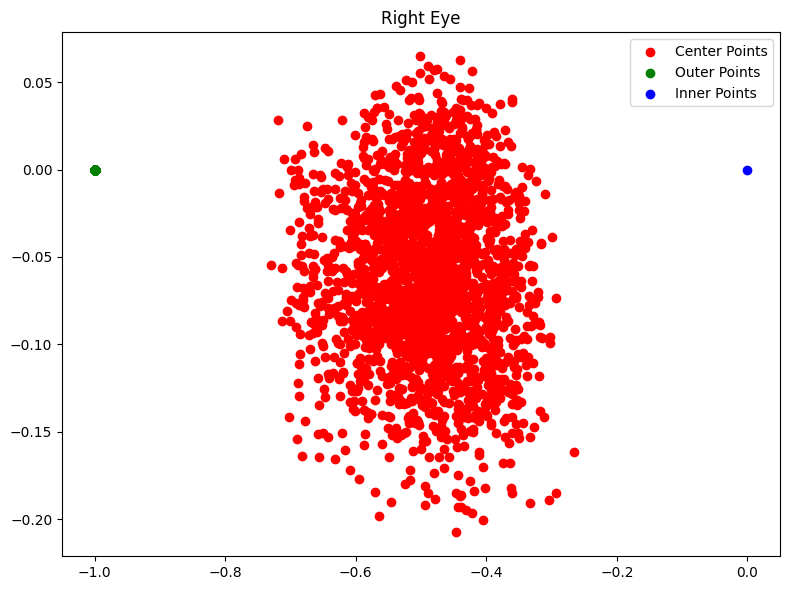

In [67]:

fig, ax = plt.subplots(1)  
fig.set_figwidth(8)
fig.set_figheight(6)


ax.set_title('Right Eye')

ax.scatter(
        x=righCenterArray[:,0] , y=righCenterArray[:,1], c='r', label='Center Points')
ax.scatter(
    x=rightOuterArray[:,0], y=rightOuterArray[:,1], c='g', label='Outer Points')
ax.scatter(x=0,y=0,c='b',label='Inner Points')

plt.tight_layout()
plt.legend()
plt.show()

fig.savefig("I2HEAD_Right_Eye.png")


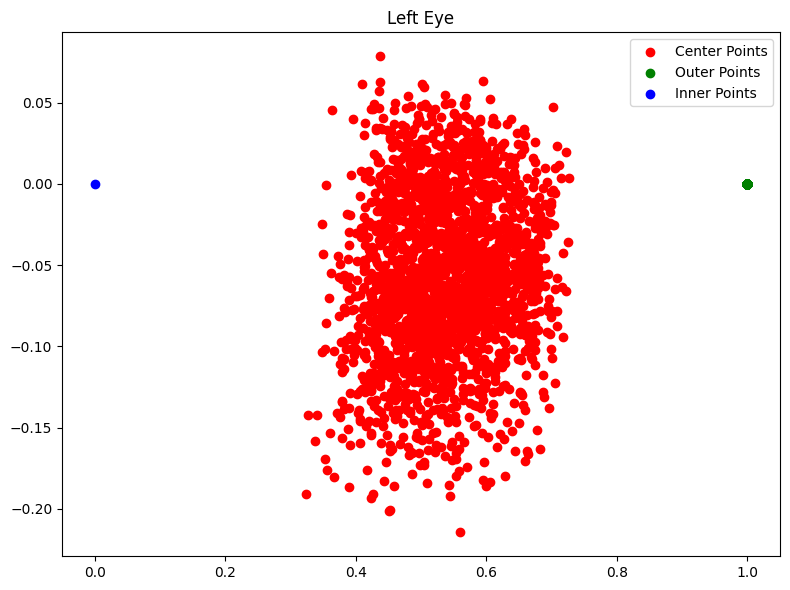

In [68]:
fig2, ax2 = plt.subplots(1)  
fig2.set_figwidth(8)
fig2.set_figheight(6)

ax2.set_title("Left Eye")

ax2.scatter(
        x=leftCenterarry[:,0] , y=leftCenterarry[:,1], c='r', label='Center Points')
ax2.scatter(
    x=leftOuterArray[:,0], y=leftOuterArray[:,1], c='g', label='Outer Points')

ax2.scatter(x=0,y=0,c='b',label='Inner Points')


plt.tight_layout()
plt.legend()
plt.show()


fig2.savefig("I2HEAD_Left_Eye.png")

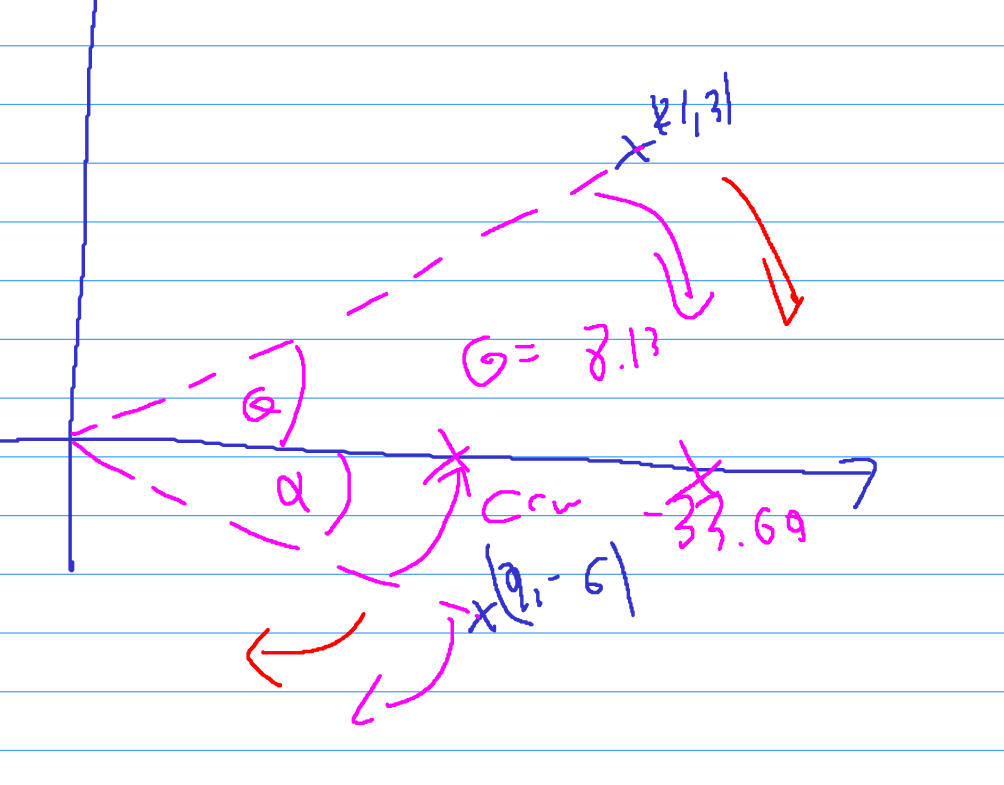

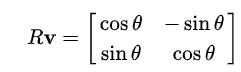  CounterClockWise

In [10]:




def getRotationMatrixForEye(theta):
    
    
    if theta < 0 :
     
        return RotationMatrix(theta=theta,clockwise=False)
    
    else:
        return RotationMatrix(theta=theta,clockwise=True)
    
    

In [11]:
getRotationMatrixForEye(-30)

array([[ 0.8660254, -0.5      ],
       [ 0.5      ,  0.8660254]])

import math
<!-- # Iterate through the Dataframe

# axs[0].plot(x, y)



for i ,(_,row) in enumerate(df.iterrows()):
    
    coordinates =  [float(x) for x in row["Coordinates"][1:-1].split(",")]
    

        
    img_name = row["ImageName"].replace('"', ' ').strip()
    
    print(img_name)
    
    image = cv2.imread(os.path.join(IMG_DIR,img_name))
    
    height,width,_ = image.shape
    
    # print(height)
    # print(img_name)
    l_i,l_c,l_o,r_i,r_c,r_o = getICO(coordinate_array=coordinates,height=height)
    
    
    # print(f"Left Inner: {l_i} Left Center:{l_c} Left Outer: {l_o}")
    
    # print(f"Right Inner: {r_i} Right Center: {r_c}  Right Outer: {r_o}")
    
    # print("#"*100)
    
    
    
    # Get relative coordiantes according to the Inner Corner
    
    left_center,left_outer = getRelativeTotheInnerCorner(l_i,l_c,l_o)
    
    right_center,right_outer = getRelativeTotheInnerCorner(r_i,r_c,r_o)
    
    
    # plt.plot(left_center[0],left_center[1], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="green")

    # plt.plot(left_outer[0],left_outer[1], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
    
    # print(left_center,left_outer)
    # print(right_center,right_outer)
    

    
    
    # print(left_outer[1]/left_center[0])
    
    # print(right_outer[1]/right_outer[0])
    
    
    # Center Angle
    left_alpha   =  math.degrees(math.atan(left_center[1]/left_center[0]))
    right_alpha  =  math.degrees(math.atan(right_center[1]/right_center[0]))
    
    
    
    
    # Outer Corner Angle
    left_theta  = math.degrees(math.atan(left_outer[1]/left_outer[0]))
    right_theta = math.degrees(math.atan(right_outer[1]/right_outer[0]))
    
    
    
    # Outer Corner Norm
    left_norm = np.linalg.norm(left_outer)
    right_norm = np.linalg.norm(right_outer)
    
    
    
    # # Normalize the Cordinate By IPD
    # left_center = np.array(left_center) * (1/left_norm)
    # left_outer = np.array(left_outer) * (1/left_norm)
    
    
    right_center = np.array(right_center )* (1/right_norm)
    right_outer = np.array(right_outer )* (1/right_norm)
    

    if left_theta or right_theta or left_alpha or right_alpha < 0:
        
        # Outer Corner Rotation Matrix relative to the Inner Corner
        rMatrix_theta = RotationMatrix(theta=right_theta,clockwise=False)
        
        
        # Center Conter Rotation Matrix relative to the Inner Corner
        rMatrix_alpha = RotationMatrix(theta=right_alpha,clockwise=False)
        
        
        # lMatrix = RotationMatrix(theta=left_theta,clockwise=False)
        
    else:
        
        
        # Outer Corner Rotation Matrix relative to the Inner Corner
        rMatrix = RotationMatrix(theta=right_theta,clockwise=True)
        
        
        # Center Conter Rotation Matrix relative to the Inner Corner
        rMatrix_alpha = RotationMatrix(theta=right_alpha,clockwise=True)
        
        # lMatrix = RotationMatrix(theta=left_theta,clockwise=True)
    
    
    
    
    rotated_center_alpha = np.matmul(rMatrix_alpha,np.array(right_center))
    
    norm_alph_vec = np.linalg.norm(rotated_center_alpha)
    

    assert round(norm_alph_vec,2) == round(np.linalg.norm(np.array(right_center)),2)
    
    
    
    
    rotated_outer_theta = np.matmul(rMatrix_theta,np.array(right_outer))
    norm_theta_vec = np.linalg.norm(rotated_outer_theta)
    
    
    assert round(norm_theta_vec,2) == round(np.linalg.norm(np.array(right_outer)),2)
    
    
    
    
    
    # left_center_rotated  = np.matmul(lMatrix,np.array(left_center))
    
    # left_outer_rotated  = np.matmul(lMatrix,np.array(left_outer))
    
    # right_center_rotated  = np.matmul(rMatrix,np.array(right_center))
    
    
    
    # right_outer_rotated  = np.matmul(rMatrix,np.array(right_outer))
    
    
    axs[1].plot(rotated_center_alpha[0],rotated_center_alpha[1],'tab:orange')
    
    
    # plt.plot(rotated_center_alpha[0],rotated_center_alpha[1], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="green")

    # plt.plot(rotated_outer_theta[0],rotated_outer_theta[1], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
    
    
    
    
    
   
    # if i==0:
    #     break -->


In [9]:
def getRelativeTotheInnerCorner(inner_array,center_array,outer_array,left=True):
    
    """Get relative distance compared to the Inner corner for
    both center and outer Couner

    Returns:
        _List_: _Center & Outer Array_
    """
    
    if left:
        
        center_array[0] = inner_array[0] - center_array[0] 
        center_array[1] = inner_array[1] - center_array[1]  
        
        
        outer_array[0] =  inner_array[0] - outer_array[0] 
        outer_array[1] = inner_array[1]- outer_array[1] 
        
        
    else:
        center_array[0] =  center_array[0]  - inner_array[0]
        center_array[1] =  center_array[1] - inner_array[1] 
        
        
        outer_array[0] =   outer_array[0] - inner_array[0]
        outer_array[1] =  outer_array[1] - inner_array[1]
    
    return center_array,outer_array
    

In [8]:
def referecneBL(array,height):
    """
    Change coorinates starting Point

    Args:
        array (_type_): _description_
        height (_type_): _description_

    Returns:
        _type_: _description_
    """
    for i in range(0,len(array)):
        if i==1 or i%2 !=0:
            
            array[i] = height - array[i]
            
    return array
            
        

In [7]:
def getICO(coordinate_array,height):
    """Return Inner ,Center and Outer Coordinates of the Eye

    Args:
        coordinate_array (_Float_): _Coordinates Of Eyes_
    """
    
    coordinate_array = referecneBL(coordinate_array,height)

    return coordinate_array[0:2], coordinate_array[2:4], coordinate_array[4:6], coordinate_array[6:8], coordinate_array[8:10], coordinate_array[10:12]


	[728.6191664186978, 279.1089274466278],
    [753.1352084913697, 284.69405426271993]
    [769.3689635963638, 295.40919537162404] 
    
    
    [830.5073920799919, 318.220306575778] 
    [854.0243359720351, 322.2829534936786]
    [871.317916654233, 333.75469101799985]


In [ ]:
img = cv2.imread(os.path.join(IMG_DIR,"MPIIGaze/Data/Original/p08/day30/0250.jpg"))
print(img.shape)

In [ ]:
# 322	MPIIGaze/Data/Original/p08/day30/0250.jpg"

In [ ]:
img = cv2.imread(os.path.join(IMG_DIR,"MPIIGaze/Data/Original/p08/day30/0250.jpg"))


print(img.shape)

	[728.6191664186978, 279.1089274466278
    , 753.1352084913697, 284.69405426271993,
     769.3689635963638, 295.40919537162404, 
     
     
     
    830.5073920799919, 318.220306575778,
     
    854.0243359720351, 322.2829534936786, 
    871.317916654233, 333.75469101799985]
